In [1]:
!pwd

/pscratch/sd/a/ayanmitr/Results/SRD_OUTPUT_Varyall/COSMOSIS-CHAINS


# SRD Y10 SN + Om Prior + H0 Prior 
##### emcee sampler used
##### lsst_srd_y10_sys_base_prior

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cosmosis.postprocess import parser
from cosmosis.postprocessing.inputs import read_input
from cosmosis.postprocessing.postprocess import postprocessor_for_sampler
from cosmosis.postprocessing.plots import MetropolisHastingsPlots2D, MetropolisHastingsPlots1D
import os
import csv
import warnings
warnings.filterwarnings('ignore')

#### Input Parameters
##### [cosmological_parameters]
##### omega_m  =  0.1 0.3156 0.6
##### h0  =  0.6 0.6727 0.76
##### w = -2.0 0.0
##### wa = -2.5 0  2.5
##### omega_b  =  0.045
##### omega_k  =  0.0
##### tau = 0.08
##### n_s = 0.971
##### log1e10As = 3.0448
##### sigma8_input = 0.801

##### [firecrown_supernova_parameters]
##### sn_ddf_sample_m  = -19.7 -19.43 -19.0

#### Priors : stage_3_prior : Om and H0
##### omega_m = gaussian 0.3156 0.0108353924585 
##### h0 = gaussian 0.6727 0.050084370741 

In [2]:
def convert(lst):
    return (lst[0].split())

In [3]:
Burnin = 300000
path = '/pscratch/sd/a/ayanmitr/Results/SRD_OUTPUT_Varyall/'
sampler, ini = read_input('lsst_srd_y10_sys_base_prior.ini')
os.makedirs(path, exist_ok=True)
proc = postprocessor_for_sampler(sampler)(ini, "lsst_srd_y10_sys_base_prior", 0, burn=Burnin, no_2d=False)
#---------------------------------------------------
# Printintg out the parameter list
with open('lsst_srd_y10_sys_base_prior.txt') as f:
    reader = csv.reader(f)
    row1 = next(reader)  # gets the first line
row1 = [word.replace('\t','  ') for word in row1]
row1 = [word.replace('#','  ') for word in row1]  
#print('\n\n',row1)
row1 = convert(row1)
print('Parameter List:')

LOADING CHAIN FROM FILE:  lsst_srd_y10_sys_base_prior.txt
Parameter List:


In [40]:
row1

['cosmological_parameters--omega_m',
 'cosmological_parameters--h0',
 'cosmological_parameters--w',
 'cosmological_parameters--wa',
 'firecrown_supernova_parameters--sn_ddf_sample_m',
 'prior',
 'post']

In [8]:
print("Full Data size")
np.shape(proc.data)

Full Data size


(1, 640000, 7)

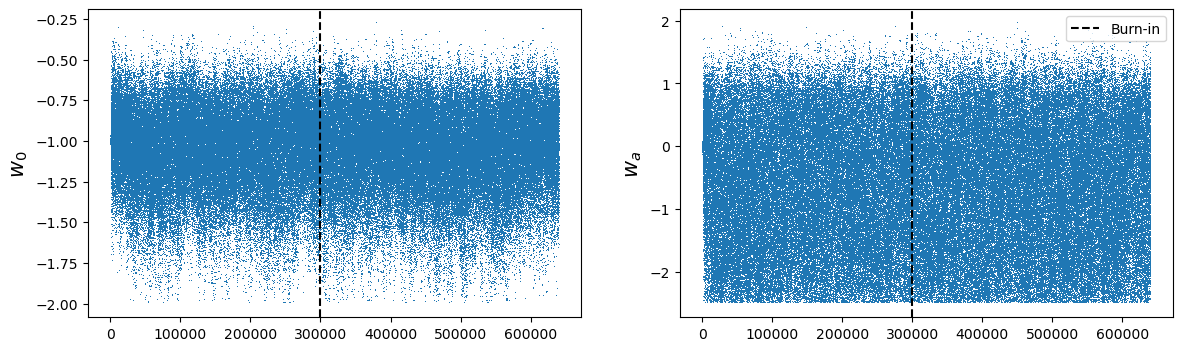

In [44]:
plt.rcParams['figure.figsize'] = [14,4] 
plt.subplot(1,2,1)
plt.plot(proc.data[0][:,2], ',')
plt.axvline(Burnin,linestyle='--',c='black') # check that the burn-in above is enough
plt.ylabel('$w_0$',fontsize=15)
plt.subplot(1,2,2)
plt.plot(proc.data[0][:,3], ',')
plt.axvline(Burnin,linestyle='--',c='black',label='Burn-in') # check that the burn-in above is enough
plt.ylabel('$w_a$',fontsize=15)
plt.legend()

Text(0.5, 0, '$w_a$')

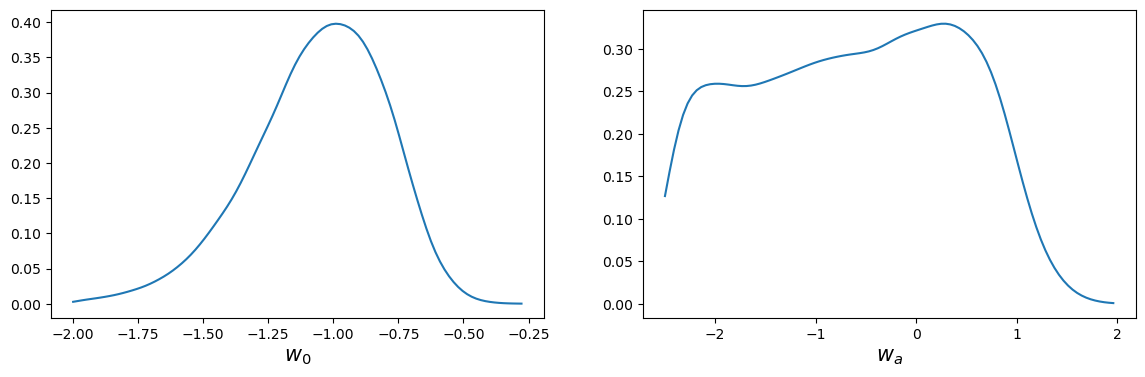

In [48]:
plt.rcParams['figure.figsize'] = [14,4] 

plotter = MetropolisHastingsPlots1D(proc,)
x = plotter.reduced_col("cosmological_parameters--w") # w0
y = plotter.reduced_col("cosmological_parameters--wa")# w

y1, L1 = plotter.smooth_likelihood(x, "cosmological_parameters--w")
y2, L2 = plotter.smooth_likelihood(y, "cosmological_parameters--wa")

plt.subplot(1,2,1)
plt.plot(y1, L1)
plt.fill_between(y1,L1,color='white',alpha=0.49)
plt.xlabel("$w_0$",fontsize=15)
#plt.ylabel("Likelihood",fontsize=15)
#plt.axvline(w0m,linestyle = '--',linewidth=2,c='magenta',label=r'$w_0 = %.3f \pm %.3f$'%(w0m,w0std))
#plt.axvline(wfit[0],linestyle = '--',linewidth=2,c='black',label=r'$w_0 = %.3f \pm %.3f$'%(wfit[0],wfit[1]))
#plt.legend(loc='best',fontsize=12)
#plt.text(-1.28,0.25,'Firecrown',c='magenta',fontsize=15)
#plt.text(-1.28,0.2,'WFIT',c='black',fontsize=15)
plt.subplot(1,2,2)
plt.plot(y2, L2)
plt.fill_between(y2,L2,color='white',alpha=0.49)
plt.xlabel("$w_a$",fontsize=15)
#plt.ylabel("Likelihood",fontsize=15)
#plt.axvline(wam,linestyle = '--',linewidth=2,c='magenta',label=r'$w_a = %.3f \pm %.3f$'%(wam,wastd))
#plt.axvline(wfit[2],linestyle = '--',linewidth=2,c='black',label=r'$w_a = %.3f \pm %.3f$'%(wfit[2],wfit[3]))
#plt.legend(loc='best',fontsize=12)

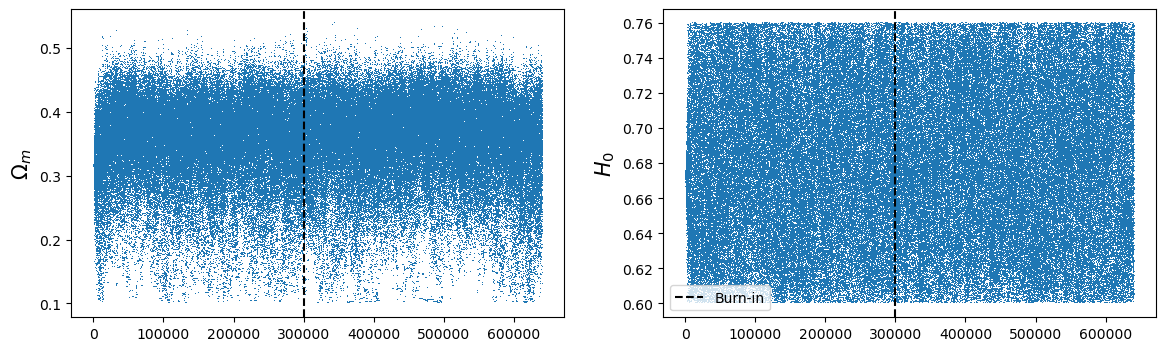

In [49]:
plt.rcParams['figure.figsize'] = [14,4] 
plt.subplot(1,2,1)
plt.plot(proc.data[0][:,0], ',')
plt.axvline(Burnin,linestyle='--',c='black') # check that the burn-in above is enough
plt.ylabel(r'$\Omega_m$',fontsize=15)
plt.subplot(1,2,2)
plt.plot(proc.data[0][:,1], ',')
plt.axvline(Burnin,linestyle='--',c='black',label='Burn-in') # check that the burn-in above is enough
plt.ylabel('$H_0$',fontsize=15)
plt.legend()

Text(0.5, 0, 'cosmological_parameters--h0')

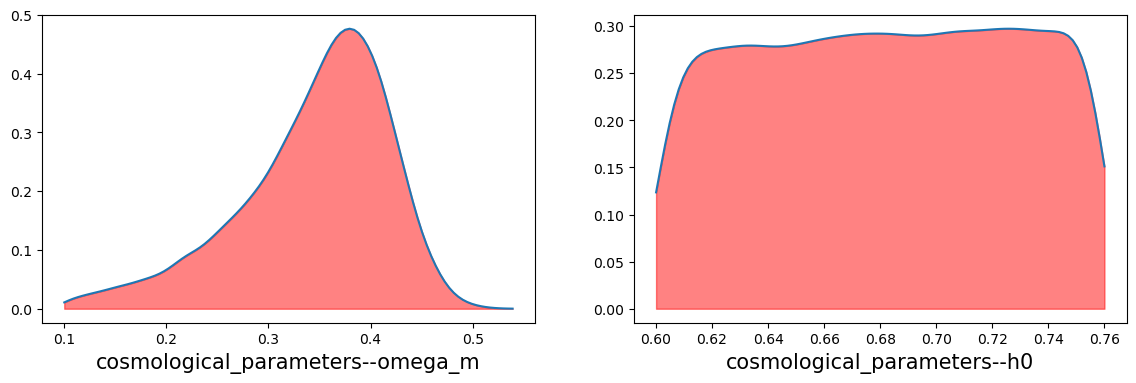

In [40]:

i = 0
j = 1
 
plt.rcParams['figure.figsize'] = [14,4] 

plotter = MetropolisHastingsPlots1D(proc)
x = plotter.reduced_col(row1[i]) # w0
y = plotter.reduced_col(row1[j])# w

y1, L1 = plotter.smooth_likelihood(x, row1[i])
y2, L2 = plotter.smooth_likelihood(y, row1[j])

plt.subplot(1,2,1)
plt.plot(y1, L1)
plt.fill_between(y1,L1,color='r',alpha=0.49)
plt.xlabel(row1[i],fontsize=15)

plt.subplot(1,2,2)
plt.plot(y2, L2)
plt.fill_between(y2,L2,color='r',alpha=0.49)
plt.xlabel(row1[j],fontsize=15)

Text(0.5, 0, 'firecrown_supernova_parameters--sn_ddf_sample_m')

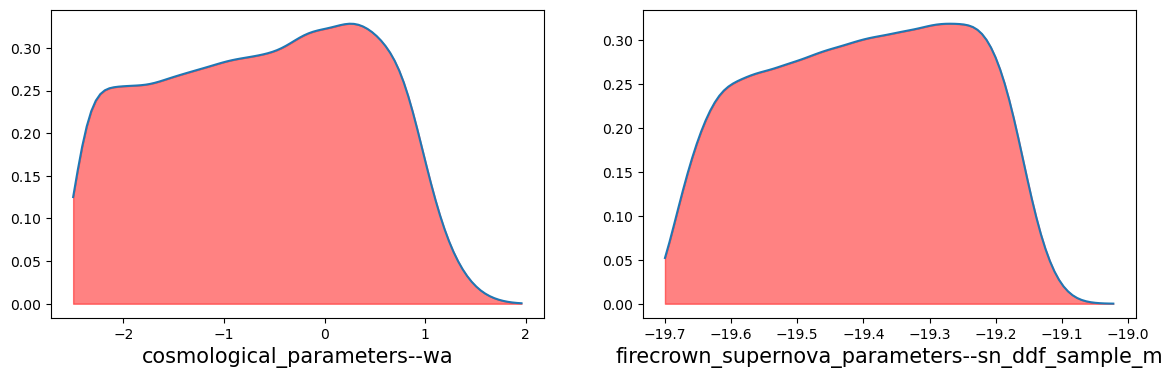

In [44]:

i = 3
j = 4
 
plt.rcParams['figure.figsize'] = [14,4] 

plotter = MetropolisHastingsPlots1D(proc)
x = plotter.reduced_col(row1[i]) # w0
y = plotter.reduced_col(row1[j])# w

y1, L1 = plotter.smooth_likelihood(x, row1[i])
y2, L2 = plotter.smooth_likelihood(y, row1[j])

plt.subplot(1,2,1)
plt.plot(y1, L1)
plt.fill_between(y1,L1,color='r',alpha=0.49)
plt.xlabel(row1[i],fontsize=15)

plt.subplot(1,2,2)
plt.plot(y2, L2)
plt.fill_between(y2,L2,color='r',alpha=0.49)
plt.xlabel(row1[j],fontsize=15)

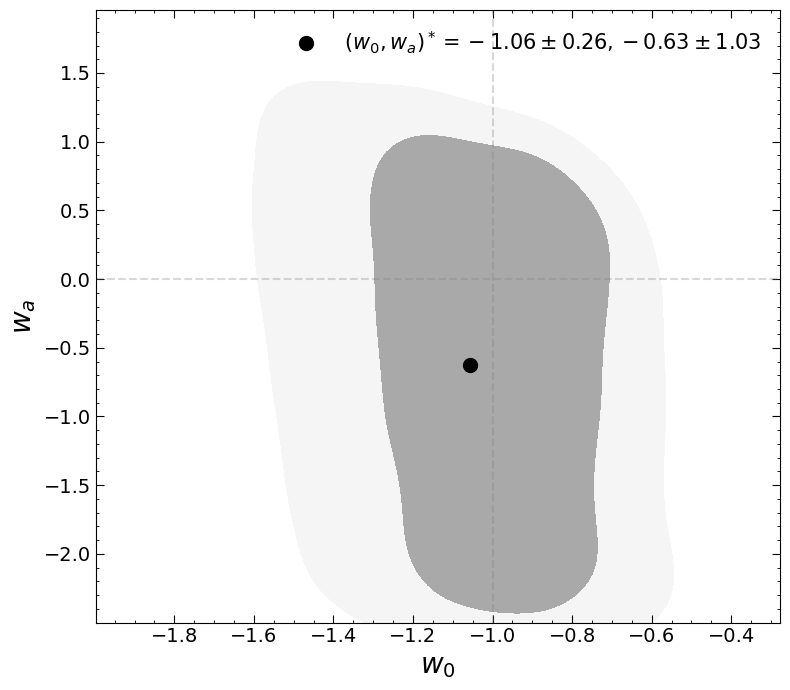

In [4]:
plt.rcParams['figure.figsize'] = [8,7] 
txt='SN SRD 10 '
fig, ax = plt.subplots()
plotter = MetropolisHastingsPlots2D(proc)
x = plotter.reduced_col("cosmological_parameters--w") # w0
y = plotter.reduced_col("cosmological_parameters--wa")# wa
xax, yax, like = plotter.smooth_likelihood(x, y, "cosmological_parameters--wa",  "cosmological_parameters--w")
level1, level2,l3  = plotter._find_contours(like, x, y, xax, yax, 1 - 0.68, 1 - 0.95)
w0m  =  np.mean(x);w0std=  np.std(x);
wam  =  np.mean(y);wastd=  np.std(y);
ax.contourf(xax, yax, like.T, [level2,level1],colors=['white', 'whitesmoke','darkgrey'], extend='both')
ax.plot(np.mean(x),np.mean(y),'o',c='black',markersize=10,label=r'$(w_0 ,w_a)^*= %.2f\pm %.2f,%.2f \pm %.2f$'%(w0m,w0std,wam,wastd))
ax.set_xlabel(r'$w_0$',fontsize=20)
ax.set_ylabel(r'$w_a$',fontsize=20)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.minorticks_on()
ax.tick_params(which = 'both',direction="in")
ax.tick_params(length=6)
plt.legend(loc = 'upper right',prop={'size': 15},frameon=False)
#plt.text(-1.25,-0.75,"$^*$%s"%txt,fontsize=20,color='black')
#plt.text(-0.92,0.2,'Sampler : Emcee \nSN : SNANA simulations \nSpectroscopic sample\nCMB : Planck 2018 \nBAO : SDSS DR12, SDSS MGS, 6dFGS',fontsize=10)
plt.yticks(fontsize=14);plt.xticks(fontsize=14)
plt.axhline(0, linestyle = '--',color='grey',alpha = 0.3)
plt.axvline(-1, linestyle = '--',color='grey',alpha=0.3)
plt.tight_layout()
#plt.savefig(path+'output/2D.pdf',bbox_inches='tight')

In [9]:
print("Data size after Burn In")
print(len(x))

Data size after Burn In
340000


In [18]:
'''
plotter = MetropolisHastingsPlots2D(proc)

fig = plt.figure()
plotter.make_2d_plot("cosmological_parameters--w", "cosmological_parameters--wa", fig)
#plt.close()
''';

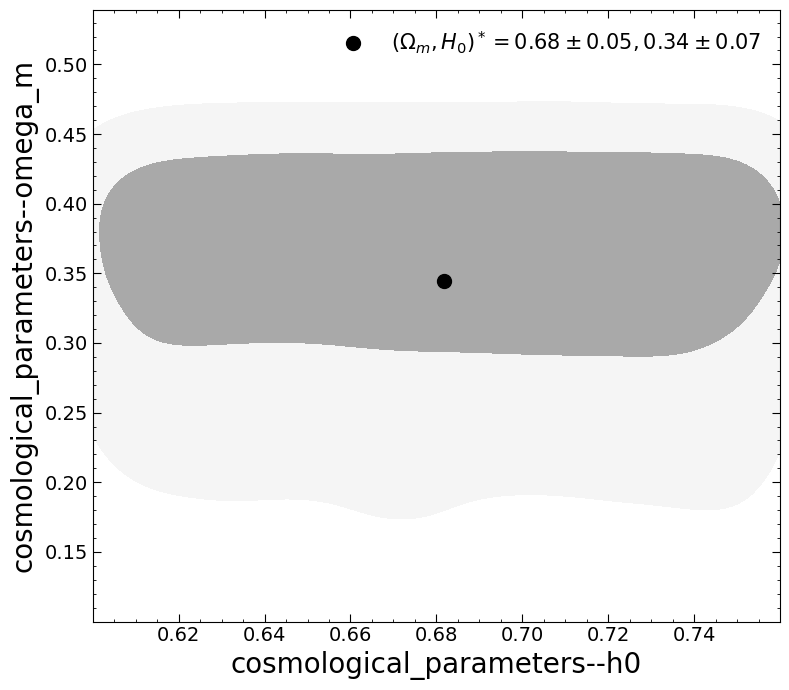

In [28]:
plt.rcParams['figure.figsize'] = [8,7] 
txt='SN + CMB + BAO'
i = 1
j = 0
fig, ax = plt.subplots()
plotter = MetropolisHastingsPlots2D(proc)
x = plotter.reduced_col(row1[i]) # w0
y = plotter.reduced_col(row1[j])# wa
xax, yax, like = plotter.smooth_likelihood(x, y, row1[i],  row1[j])
level1, level2,l3  = plotter._find_contours(like, x, y, xax, yax, 1 - 0.68, 1 - 0.95)
w0m  =  np.mean(x);w0std=  np.std(x);
wam  =  np.mean(y);wastd=  np.std(y);
ax.contourf(xax, yax, like.T, [level2,level1],colors=['white', 'whitesmoke','darkgrey'], extend='both')
ax.plot(np.mean(x),np.mean(y),'o',c='black',markersize=10,label=r'$(\Omega_m ,H_0)^*= %.2f\pm %.2f,%.2f \pm %.2f$'%(w0m,w0std,wam,wastd))
ax.set_xlabel(row1[i],fontsize=20)
ax.set_ylabel(row1[j],fontsize=20)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.minorticks_on()
ax.tick_params(which = 'both',direction="in")
ax.tick_params(length=6)
plt.legend(loc = 'upper right',prop={'size': 15},frameon=False)
#plt.text(-1.25,-0.75,"$^*$%s"%txt,fontsize=20,color='black')
#plt.text(-0.92,0.2,'Sampler : Emcee \nSN : SNANA simulations \nSpectroscopic sample\nCMB : Planck 2018 \nBAO : SDSS DR12, SDSS MGS, 6dFGS',fontsize=10)
plt.yticks(fontsize=14);plt.xticks(fontsize=14)
#plt.axhline(0, linestyle = '--',color='grey',alpha = 0.3)
#plt.axvline(-1, linestyle = '--',color='grey',alpha=0.3)
plt.tight_layout()
#plt.savefig(path+'output/2D.pdf',bbox_inches='tight')

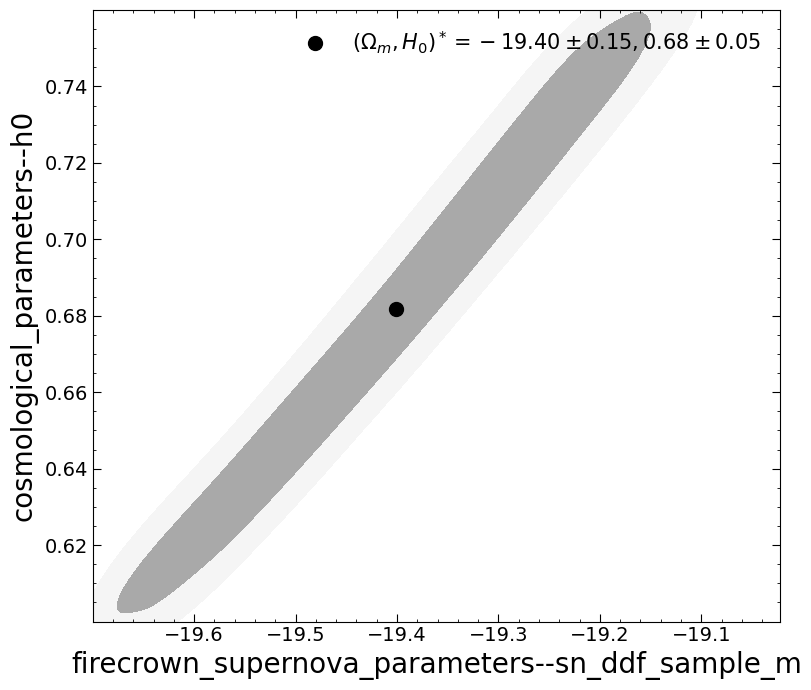

In [29]:
plt.rcParams['figure.figsize'] = [8,7] 
txt='SN + CMB + BAO'
i = 4
j = 1
fig, ax = plt.subplots()
plotter = MetropolisHastingsPlots2D(proc)
x = plotter.reduced_col(row1[i]) # w0
y = plotter.reduced_col(row1[j])# wa
xax, yax, like = plotter.smooth_likelihood(x, y, row1[i],  row1[j])
level1, level2,l3  = plotter._find_contours(like, x, y, xax, yax, 1 - 0.68, 1 - 0.95)
w0m  =  np.mean(x);w0std=  np.std(x);
wam  =  np.mean(y);wastd=  np.std(y);
ax.contourf(xax, yax, like.T, [level2,level1],colors=['white', 'whitesmoke','darkgrey'], extend='both')
ax.plot(np.mean(x),np.mean(y),'o',c='black',markersize=10,label=r'$(\Omega_m ,H_0)^*= %.2f\pm %.2f,%.2f \pm %.2f$'%(w0m,w0std,wam,wastd))
ax.set_xlabel(row1[i],fontsize=20)
ax.set_ylabel(row1[j],fontsize=20)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.minorticks_on()
ax.tick_params(which = 'both',direction="in")
ax.tick_params(length=6)
plt.legend(loc = 'upper right',prop={'size': 15},frameon=False)
#plt.text(-1.25,-0.75,"$^*$%s"%txt,fontsize=20,color='black')
#plt.text(-0.92,0.2,'Sampler : Emcee \nSN : SNANA simulations \nSpectroscopic sample\nCMB : Planck 2018 \nBAO : SDSS DR12, SDSS MGS, 6dFGS',fontsize=10)
plt.yticks(fontsize=14);plt.xticks(fontsize=14)
#plt.axhline(0, linestyle = '--',color='grey',alpha = 0.3)
#plt.axvline(-1, linestyle = '--',color='grey',alpha=0.3)
plt.tight_layout()
#plt.savefig(path+'output/2D.pdf',bbox_inches='tight')

In [ ]:
plt.rcParams['figure.figsize'] = [9,7] 
txt='SN + CMB + BAO'
i = 4
j = 1
fig, ((ax,ax1),(ax2,ax3)) = plt.subplots(2,2)
plotter = MetropolisHastingsPlots2D(proc)
x = plotter.reduced_col(row1[i]) # w0
y = plotter.reduced_col(row1[j])# wa
xax, yax, like = plotter.smooth_likelihood(x, y, row1[i],  row1[j])
level1, level2,l3  = plotter._find_contours(like, x, y, xax, yax, 1 - 0.68, 1 - 0.95)
w0m  =  np.mean(x);w0std=  np.std(x);
wam  =  np.mean(y);wastd=  np.std(y);
ax.contourf(xax, yax, like.T, [level2,level1],colors=['white', 'darkgrey','grey'], extend='both')
ax.plot(np.mean(x),np.mean(y),'o',c='black',markersize=10,label=r'$(\Omega_m ,H_0)^*= %.2f\pm %.2f,%.2f \pm %.2f$'%(w0m,w0std,wam,wastd))
ax.set_xlabel(row1[i],fontsize=10)
ax.set_ylabel(row1[j],fontsize=10)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.minorticks_on()
ax.tick_params(which = 'both',direction="in")
ax.tick_params(length=6)
ax.legend(prop={'size': 8},frameon=False)
#plt.text(-1.25,-0.75,"$^*$%s"%txt,fontsize=20,color='black')
#plt.text(-0.92,0.2,'Sampler : Emcee \nSN : SNANA simulations \nSpectroscopic sample\nCMB : Planck 2018 \nBAO : SDSS DR12, SDSS MGS, 6dFGS',fontsize=10)
plt.yticks(fontsize=14);plt.xticks(fontsize=14)
#plt.axhline(0, linestyle = '--',color='grey',alpha = 0.3)
#plt.axvline(-1, linestyle = '--',color='grey',alpha=0.3)
#plt.tight_layout()
#plt.savefig(path+'output/2D.pdf',bbox_inches='tight')

i = 1
j = 0
plotter = MetropolisHastingsPlots2D(proc)
x = plotter.reduced_col(row1[i]) # w0
y = plotter.reduced_col(row1[j])# wa
xax, yax, like = plotter.smooth_likelihood(x, y, row1[i],  row1[j])
level1, level2,l3  = plotter._find_contours(like, x, y, xax, yax, 1 - 0.68, 1 - 0.95)
w0m  =  np.mean(x);w0std=  np.std(x);
wam  =  np.mean(y);wastd=  np.std(y);
ax1.contourf(xax, yax, like.T, [level2,level1],colors=['white', 'darkgrey','grey'], extend='both')
ax1.plot(np.mean(x),np.mean(y),'o',c='black',markersize=10,label=r'$(\Omega_m ,H_0)^*= %.2f\pm %.2f,%.2f \pm %.2f$'%(w0m,w0std,wam,wastd))
ax1.set_xlabel(row1[i],fontsize=10)
ax1.set_ylabel(row1[j],fontsize=10)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which = 'both',direction="in")
ax1.tick_params(length=6)
ax1.legend(prop={'size': 8},frameon=False)
#plt.text(-1.25,-0.75,"$^*$%s"%txt,fontsize=20,color='black')
#plt.text(-0.92,0.2,'Sampler : Emcee \nSN : SNANA simulations \nSpectroscopic sample\nCMB : Planck 2018 \nBAO : SDSS DR12, SDSS MGS, 6dFGS',fontsize=10)
plt.yticks(fontsize=14);plt.xticks(fontsize=14)
#plt.axhline(0, linestyle = '--',color='grey',alpha = 0.3)
#plt.axvline(-1, linestyle = '--',color='grey',alpha=0.3)
#plt.tight_layout()




i = 2
j = 3
plotter = MetropolisHastingsPlots2D(proc)
x = plotter.reduced_col(row1[i]) # w0
y = plotter.reduced_col(row1[j])# wa
xax, yax, like = plotter.smooth_likelihood(x, y, row1[i],  row1[j])
level1, level2,l3  = plotter._find_contours(like, x, y, xax, yax, 1 - 0.68, 1 - 0.95)
w0m  =  np.mean(x);w0std=  np.std(x);
wam  =  np.mean(y);wastd=  np.std(y);
ax2.contourf(xax, yax, like.T, [level2,level1],colors=['white', 'darkgrey','grey'], extend='both')
ax2.plot(np.mean(x),np.mean(y),'o',c='black',markersize=10,label=r'$(\Omega_m ,H_0)^*= %.2f\pm %.2f,%.2f \pm %.2f$'%(w0m,w0std,wam,wastd))
ax2.set_xlabel(row1[i],fontsize=10)
ax2.set_ylabel(row1[j],fontsize=10)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
ax2.tick_params(which = 'both',direction="in")
ax2.tick_params(length=6)
ax2.legend(prop={'size': 8},frameon=False)
#plt.text(-1.25,-0.75,"$^*$%s"%txt,fontsize=20,color='black')
#plt.text(-0.92,0.2,'Sampler : Emcee \nSN : SNANA simulations \nSpectroscopic sample\nCMB : Planck 2018 \nBAO : SDSS DR12, SDSS MGS, 6dFGS',fontsize=10)
plt.yticks(fontsize=14);plt.xticks(fontsize=14)
#plt.axhline(0, linestyle = '--',color='grey',alpha = 0.3)
#plt.axvline(-1, linestyle = '--',color='g

i = -1
plotter = MetropolisHastingsPlots1D(proc)
x = plotter.reduced_col(row1[i]) # w0
y1, L1 = plotter.smooth_likelihood(x, row1[i])
ax3.plot(y1, L1)
ax3.fill_between(y1,L1,color='darkgrey',alpha=0.49)
ax3.set_xlabel(row1[i],fontsize=15)
